In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
data = pd.read_csv("E:\\Uber Price\\dynamic_pricing.csv")

In [9]:
data.drop(["pickup_time","Unnamed: 0"],axis = 1 ,inplace = True)

In [11]:
data.head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,fare,distance_km,hour_of_day,day_of_week
0,40.661892,-74.099538,40.804224,-73.921646,44.447258,21.797898,13.0,4.0
1,40.647121,-74.001196,40.671148,-73.980653,5.967028,3.184398,5.0,0.0
2,40.677510,-74.049418,40.734420,-73.908095,26.107804,13.489065,16.0,3.0
3,40.675546,-74.007569,40.791035,-73.987538,25.690718,12.952251,16.0,0.0
4,40.639667,-74.092057,40.636865,-73.930302,28.222796,13.652295,22.0,1.0


In [13]:
X = data.drop(["fare"],axis = 1)
y = data["fare"]

In [17]:
X.head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week
0,40.661892,-74.099538,40.804224,-73.921646,21.797898,13.0,4.0
1,40.647121,-74.001196,40.671148,-73.980653,3.184398,5.0,0.0
2,40.677510,-74.049418,40.734420,-73.908095,13.489065,16.0,3.0
3,40.675546,-74.007569,40.791035,-73.987538,12.952251,16.0,0.0
4,40.639667,-74.092057,40.636865,-73.930302,13.652295,22.0,1.0


In [19]:
y.head()

0    44.447258
1     5.967028
2    26.107804
3    25.690718
4    28.222796
Name: fare, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model

LinearRegression()

In [25]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)
y_pred

array([ 9.09414752, 24.65063221, 42.67549114, 34.94338682, 13.43079295,
       23.5006871 , 12.30481067, 17.94264249, 19.43739873, 23.10239919,
        8.47700722, 18.79391245, 18.22074424, 14.06635946, 43.17840563,
       25.22901046, 25.57115435, 36.95376092, 29.31070137, 14.87033576,
       13.24721217, 14.05463958,  7.79955631, 26.44560817,  3.99102857,
       23.85644536, 15.14499438, 14.05453796, 37.51795861, 14.50632158,
       29.04752204, 23.12368855,  6.02514737,  8.95875667, 19.92997034,
       24.66236874, 10.01283697, 40.22785326,  8.34132418, 32.01358984,
       32.98797861, 23.85083233,  8.59264911, 12.51599127, 27.58587815,
       21.44414378, 15.3887688 , 43.39599836,  2.06753967,  8.26297256,
       48.27152536, 12.85933059, 17.24253493, 12.40735863, 19.09786441,
       16.03426423, 17.78090692, 42.72999979, 15.61800073, 43.42336123,
       20.40266446, 26.37145506, 24.53385363, 17.01199867, 12.57213319,
       24.44101187, 14.4705084 , 24.37147026, 13.185633  ,  6.64

In [43]:
mse = mean_squared_error(y_test, y_pred)
mse

0.3428221569499087

In [55]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.5085314154865099

In [39]:
X_test

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week
1801,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0
1190,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0
1817,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0
251,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0
2505,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0
...,...,...,...,...,...,...,...
104,40.796734,-73.952695,40.714702,-73.930959,9.303506,0.0,5.0
2087,40.657267,-74.042996,40.633203,-74.097913,5.350526,17.0,1.0
599,40.625462,-73.969719,40.779417,-73.955873,17.158718,2.0,2.0
1756,40.774858,-73.953619,40.714174,-74.022666,8.908936,19.0,1.0


In [45]:
data

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,fare,distance_km,hour_of_day,day_of_week
0,40.661892,-74.099538,40.804224,-73.921646,44.447258,21.797898,13.0,4.0
1,40.647121,-74.001196,40.671148,-73.980653,5.967028,3.184398,5.0,0.0
2,40.677510,-74.049418,40.734420,-73.908095,26.107804,13.489065,16.0,3.0
3,40.675546,-74.007569,40.791035,-73.987538,25.690718,12.952251,16.0,0.0
4,40.639667,-74.092057,40.636865,-73.930302,28.222796,13.652295,22.0,1.0
...,...,...,...,...,...,...,...,...
2995,40.725692,-74.093554,40.715675,-74.035115,9.460486,5.049354,7.0,5.0
2996,40.648510,-74.094390,40.617536,-74.037447,11.533480,5.911949,20.0,5.0
2997,40.644000,-74.086486,40.808511,-73.976331,41.379023,20.513163,6.0,4.0
2998,40.781228,-73.949285,40.645025,-73.960048,30.627958,15.172307,21.0,2.0


In [47]:
data["fare"].mean()

20.506501464038767

In [57]:
X_test.head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week
1801,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0
1190,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0
1817,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0
251,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0
2505,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0


In [63]:
Actual_Fare = pd.DataFrame(y_test).reset_index()

In [67]:
Actual_Fare.drop(["index"],axis = 1 ,inplace = True)

In [69]:
Actual_Fare.head()

,fare
0,8.391026
1,25.467815
2,42.163247
3,34.971774
4,13.268187


In [75]:
Actual_Fare.rename(columns = {"fare":"Actual_Fare"},inplace= True)

In [107]:
Actual_Fare.head()

,Actual_Fare
0,8.391026
1,25.467815
2,42.163247
3,34.971774
4,13.268187


In [99]:
X_test.reset_index(inplace = True)

In [103]:
X_test.drop(["index"],axis = 1 ,inplace = True)

In [105]:
X_test.head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week
0,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0
1,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0
2,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0
3,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0
4,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0


In [111]:
Predict_Value = pd.DataFrame(y_pred)

In [135]:
Predict_Value.rename(columns = {0:"Predict_Value"},inplace = True)

In [137]:
Predict_Value

,Predict_Value
0,9.094148
1,24.650632
2,42.675491
3,34.943387
4,13.430793
...,...
595,18.576114
596,10.659109
597,34.408840
598,17.747754


In [139]:
Actual_Fare.head()
Actual_Fare.columns

Index(['Actual_Fare'], dtype='object')

In [141]:
Predict_Value.head()
Predict_Value.columns

Index(['Predict_Value'], dtype='object')

In [143]:
Evaluation  = pd.concat([X_test,Actual_Fare,Predict_Value],axis = 1)

In [145]:
Evaluation

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value
0,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0,8.391026,9.094148
1,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0,25.467815,24.650632
2,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0,42.163247,42.675491
3,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0,34.971774,34.943387
4,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0,13.268187,13.430793
...,...,...,...,...,...,...,...,...,...
595,40.796734,-73.952695,40.714702,-73.930959,9.303506,0.0,5.0,19.027263,18.576114
596,40.657267,-74.042996,40.633203,-74.097913,5.350526,17.0,1.0,11.128379,10.659109
597,40.625462,-73.969719,40.779417,-73.955873,17.158718,2.0,2.0,34.188557,34.408840
598,40.774858,-73.953619,40.714174,-74.022666,8.908936,19.0,1.0,18.684667,17.747754


In [147]:
Evaluation['diffrence_A-P'] = Evaluation['Actual_Fare'] - Evaluation['Predict_Value']

In [149]:
Evaluation

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P
0,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0,8.391026,9.094148,-0.703121
1,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0,25.467815,24.650632,0.817183
2,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0,42.163247,42.675491,-0.512244
3,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0,34.971774,34.943387,0.028387
4,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0,13.268187,13.430793,-0.162606
...,...,...,...,...,...,...,...,...,...,...
595,40.796734,-73.952695,40.714702,-73.930959,9.303506,0.0,5.0,19.027263,18.576114,0.451149
596,40.657267,-74.042996,40.633203,-74.097913,5.350526,17.0,1.0,11.128379,10.659109,0.469270
597,40.625462,-73.969719,40.779417,-73.955873,17.158718,2.0,2.0,34.188557,34.408840,-0.220283
598,40.774858,-73.953619,40.714174,-74.022666,8.908936,19.0,1.0,18.684667,17.747754,0.936913


In [157]:
Evaluation["Actual_Fare"].mean() -  Evaluation["Predict_Value"].mean()

-0.0066345177377762354

Text(0.5, 1.0, 'Distance vs Actual Fare')

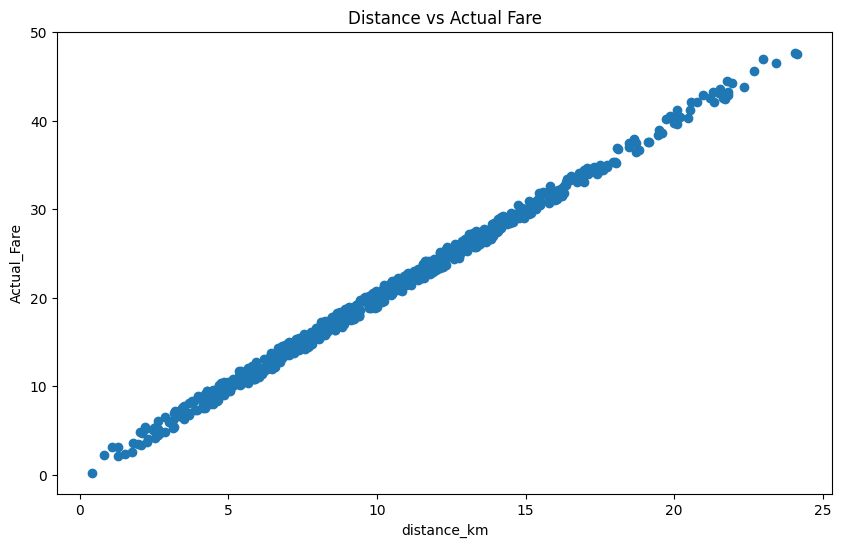

In [202]:
plt.figure(figsize= (10,6))
scatter = plt.scatter(Evaluation["distance_km"],Evaluation["Actual_Fare"])
plt.xlabel("distance_km")
plt.ylabel("Actual_Fare")
plt.title("Distance vs Actual Fare")

In [206]:
kmeans = KMeans()
kmeans.fit(Evaluation)

KMeans()

In [208]:
tsd=[]
for k in range(1,12):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(Evaluation)
    tsd.append(kmeans.inertia_)

tsd

[162621.85852539085,
 72909.44892142931,
 50785.78551991907,
 42286.11392751725,
 33467.30706355708,
 28357.17974122907,
 23074.253700651327,
 20212.954812960405,
 18715.972296566168,
 16837.832463006467,
 15762.851577878731]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


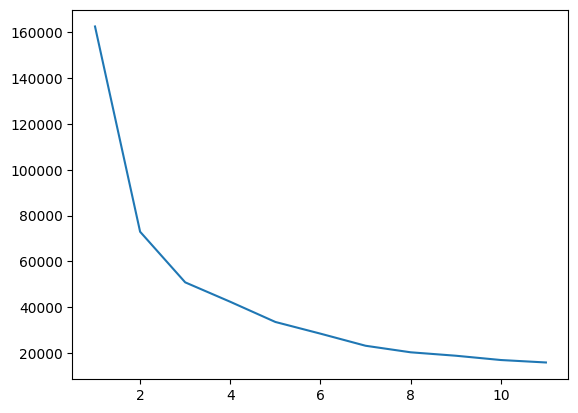

In [222]:
sns.lineplot(x= np.arange(1,12),y = tsd)

plt.show()

In [224]:
kmeans = KMeans(n_clusters= 5)
kmeans.fit(Evaluation)
kmeans.inertia_

33190.330444720596

In [226]:
kmeans.predict(Evaluation)

array([0, 1, 4, 4, 0, 3, 0, 3, 3, 3, 0, 3, 3, 2, 4, 1, 3, 4, 1, 2, 2, 2,
       0, 3, 0, 3, 0, 2, 4, 0, 1, 3, 2, 2, 3, 1, 0, 4, 2, 4, 4, 3, 0, 0,
       1, 1, 2, 4, 0, 0, 4, 2, 2, 0, 3, 2, 3, 4, 0, 4, 3, 3, 1, 2, 0, 1,
       2, 1, 2, 2, 1, 4, 0, 4, 3, 4, 2, 2, 3, 0, 2, 1, 3, 2, 4, 1, 1, 3,
       0, 1, 1, 0, 2, 3, 1, 0, 4, 0, 1, 2, 2, 0, 1, 1, 3, 0, 4, 1, 0, 1,
       1, 1, 0, 4, 3, 1, 4, 4, 0, 0, 1, 3, 1, 0, 1, 2, 1, 2, 3, 3, 0, 3,
       3, 2, 2, 0, 2, 4, 4, 2, 0, 3, 3, 4, 3, 1, 2, 1, 1, 0, 0, 3, 1, 0,
       0, 3, 3, 0, 0, 0, 0, 3, 1, 0, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 3, 1,
       0, 4, 3, 0, 2, 2, 2, 2, 3, 2, 0, 4, 2, 3, 3, 3, 3, 0, 0, 1, 2, 4,
       2, 0, 0, 2, 0, 3, 2, 1, 4, 0, 3, 0, 0, 2, 4, 3, 1, 1, 3, 0, 3, 4,
       0, 2, 1, 2, 1, 2, 1, 3, 1, 3, 2, 2, 1, 1, 2, 1, 4, 2, 0, 0, 4, 4,
       3, 3, 1, 2, 2, 2, 3, 3, 4, 3, 3, 1, 2, 3, 2, 2, 0, 1, 0, 1, 2, 3,
       0, 4, 1, 0, 1, 2, 3, 2, 3, 3, 2, 1, 0, 2, 2, 3, 2, 4, 3, 0, 4, 1,
       1, 4, 0, 3, 4, 1, 0, 4, 0, 3, 3, 2, 2, 0, 3,

In [228]:
clusters = kmeans.predict(Evaluation)

In [297]:
Evaluation["clusters"] = clusters

In [299]:
Evaluation

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P,clusters
0,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0,8.391026,9.094148,-0.703121,0
1,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0,25.467815,24.650632,0.817183,1
2,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0,42.163247,42.675491,-0.512244,4
3,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0,34.971774,34.943387,0.028387,4
4,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0,13.268187,13.430793,-0.162606,0
...,...,...,...,...,...,...,...,...,...,...,...
595,40.796734,-73.952695,40.714702,-73.930959,9.303506,0.0,5.0,19.027263,18.576114,0.451149,1
596,40.657267,-74.042996,40.633203,-74.097913,5.350526,17.0,1.0,11.128379,10.659109,0.469270,0
597,40.625462,-73.969719,40.779417,-73.955873,17.158718,2.0,2.0,34.188557,34.408840,-0.220283,4
598,40.774858,-73.953619,40.714174,-74.022666,8.908936,19.0,1.0,18.684667,17.747754,0.936913,3


Text(0.5, 1.0, 'Distance vs Actual Fare')

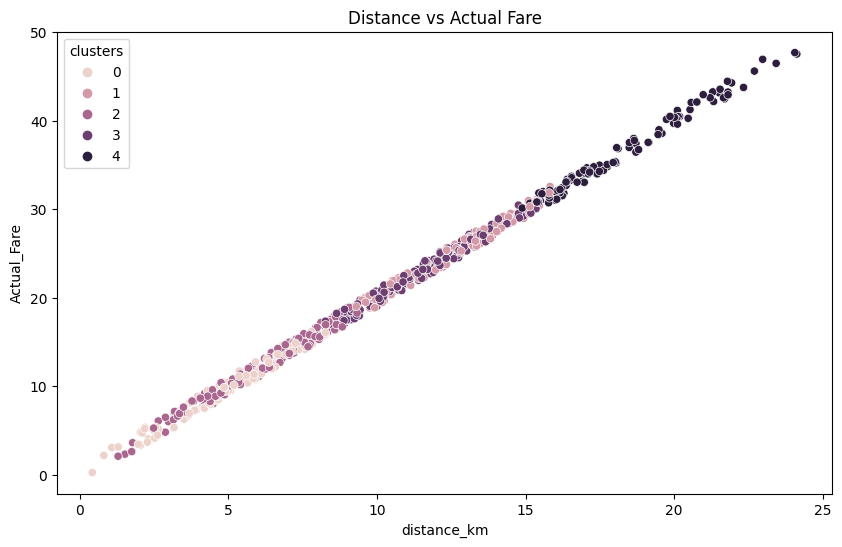

In [301]:
plt.figure(figsize= (10,6))
scatter = sns.scatterplot(data = Evaluation , x="distance_km", y= "Actual_Fare", hue = "clusters")
plt.xlabel("distance_km")
plt.ylabel("Actual_Fare")
plt.title("Distance vs Actual Fare")

In [302]:
from sklearn.metrics import silhouette_score

In [305]:
silhouette_score_value = silhouette_score(Evaluation, clusters, metric='euclidean')
silhouette_score_value

0.3502928176837412

In [307]:
Evaluation["clusters"].value_counts()

clusters
3    139
2    130
0    116
1    116
4     99
Name: count, dtype: int64

In [322]:
Evaluation[Evaluation["clusters"] == 0].head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P,clusters
0,40.644874,-74.024849,40.632948,-74.076771,4.577389,22.0,0.0,8.391026,9.094148,-0.703121,0
4,40.756738,-74.029075,40.798522,-73.970962,6.747676,19.0,1.0,13.268187,13.430793,-0.162606,0
6,40.767228,-74.006335,40.729077,-73.952651,6.200592,21.0,1.0,11.739959,12.304811,-0.564852,0
10,40.652814,-74.040867,40.677084,-74.001755,4.262074,13.0,0.0,9.408132,8.477007,0.931125,0
22,40.637708,-73.957559,40.660625,-73.922136,3.927497,15.0,2.0,7.345199,7.799556,-0.454358,0


In [324]:
Evaluation[Evaluation["clusters"] == 1].head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P,clusters
1,40.640156,-74.102235,40.731499,-74.019717,12.311559,10.0,0.0,25.467815,24.650632,0.817183,1
15,40.772805,-74.003289,40.659312,-74.001922,12.620331,2.0,4.0,26.039109,25.229010,0.810099,1
18,40.743075,-74.094699,40.665602,-73.953957,14.661634,6.0,2.0,29.482256,29.310701,0.171555,1
30,40.659770,-73.945141,40.785104,-73.992562,14.498176,13.0,4.0,29.526289,29.047522,0.478767,1
35,40.661452,-73.972656,40.746897,-74.065419,12.305069,10.0,5.0,24.890657,24.662369,0.228288,1


In [326]:
Evaluation[Evaluation["clusters"] == 2].head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P,clusters
13,40.757721,-74.058754,40.695072,-74.071666,7.050692,4.0,1.0,14.425724,14.066359,0.359365,2
19,40.712834,-74.080205,40.650406,-74.048404,7.441633,3.0,4.0,14.325469,14.870336,-0.544867,2
20,40.729250,-73.956248,40.788059,-73.969975,6.640672,12.0,2.0,12.751209,13.247212,-0.496003,2
21,40.666392,-74.077871,40.729491,-74.077795,7.016306,4.0,3.0,14.913459,14.054640,0.858819,2
27,40.708886,-74.050985,40.771600,-74.062338,7.038695,13.0,0.0,13.485310,14.054538,-0.569228,2


In [328]:
Evaluation[Evaluation["clusters"] == 3].head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P,clusters
5,40.690767,-73.976564,40.767808,-74.071759,11.735880,12.0,3.0,24.188568,23.500687,0.687881,3
7,40.709051,-74.029112,40.695943,-73.923806,8.995974,15.0,2.0,18.069288,17.942642,0.126646,3
8,40.657249,-74.022815,40.735150,-73.970461,9.721811,19.0,4.0,20.098859,19.437399,0.661460,3
9,40.728323,-74.005963,40.625212,-73.987115,11.575089,13.0,1.0,23.093518,23.102399,-0.008882,3
11,40.625519,-74.102082,40.698331,-74.045756,9.387420,13.0,3.0,17.988567,18.793912,-0.805345,3


In [330]:
Evaluation[Evaluation["clusters"] == 4].head()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,distance_km,hour_of_day,day_of_week,Actual_Fare,Predict_Value,diffrence_A-P,clusters
2,40.759265,-73.936117,40.613495,-74.100610,21.333028,18.0,3.0,42.163247,42.675491,-0.512244,4
3,40.759912,-74.081854,40.659905,-73.921673,17.491355,20.0,3.0,34.971774,34.943387,0.028387,4
14,40.640868,-73.915413,40.779997,-74.092966,21.524418,4.0,2.0,43.143812,43.178406,-0.034593,4
17,40.737339,-74.086520,40.641730,-73.907094,18.490143,13.0,0.0,36.968019,36.953761,0.014259,4
28,40.639005,-73.946479,40.792206,-74.038479,18.716871,19.0,5.0,36.448864,37.517959,-1.069094,4
